In [1]:
import numpy as np
import pandas as pd
import keras
import imageio
import os
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from scipy.misc import imresize
from sklearn.neighbors import KDTree
from PIL import Image

Using TensorFlow backend.


In [2]:
os.chdir('..')
rootdir = os.getcwd()
datadir = os.path.join(rootdir,'smalldataset')

In [3]:
strarr = [int(i[:-4]) for i in os.listdir(datadir)]
strarr.sort()
f = lambda x: str(x)+'.jpg'
sorted_ims = [f(i) for i in strarr]
pics = [(datadir+'\\')+i for i in sorted_ims]
images = [imageio.imread(i) for i in pics]

In [57]:
model = ResNet50(weights='imagenet',include_top=True)

In [58]:
#ims = [i/255 for i in images]
ims = np.array([np.array(Image.fromarray(i).resize((224,224))) for i in images])

In [59]:
out = model.predict(ims)
tree = KDTree(out)

<function matplotlib.pyplot.show(*args, **kw)>

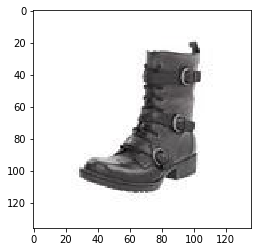

In [72]:
ioi = 25 #index of image to search
test_image = images[ioi]
plt.imshow(images[ioi])
plt.show

In [73]:
test_im = np.array(Image.fromarray(test_image).resize((224,224)))
test_im = np.expand_dims(test_im,axis=0)
test_out = model.predict(test_im)

<function matplotlib.pyplot.show(*args, **kw)>

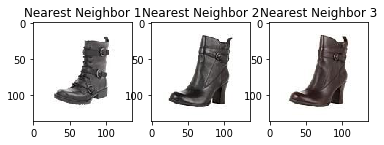

In [74]:
k = 3 #k=#matches
dist, ind = tree.query(test_out,k=k) 
fig = plt.figure()
n = 1
for i in ind[0]:
    a = fig.add_subplot(1,k,n)
    plt.imshow(images[i])
    title = 'Nearest Neighbor ' + str(n)
    a.set_title(title)
    n = n+1
plt.show